### Project Solution

Import Libraries

In [22]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Download NLTK stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the dataset

In [24]:
file_path = "/content/spam.csv"  # Using "spam.csv" dataset located at https://www.kaggle.com/uciml/sms-spam-collection-dataset/version/1
df = pd.read_csv(file_path, encoding='latin-1')

Preview data

In [25]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Keep only relevant columns (first two)

In [26]:
df = df.iloc[:, :2]
df.columns = ['label', 'message']

Convert labels to binary (spam = 1, ham = 0)

In [27]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

Text Preprocessing Function

In [28]:
def preprocess_text(text):
    text = text.encode("ascii", "ignore").decode()  # Remove non-ASCII characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespace
    words = text.split()  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]  # Stemming
    return " ".join(words) if words else "empty"  # Prevent empty messages

Apply preprocessing

In [29]:
df['processed_message'] = df['message'].apply(preprocess_text)

Create Document-Term Matrix (DTM)

In [30]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_message'])
y = df['label']

Convert DTM to DataFrame for visualization

In [31]:
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

Display the first 10 rows of the Document-Term Matrix

In [32]:
print("\nDocument-Term Matrix (DTM) with Documents as Rows and Words as Columns (First 10 Rows):")
dtm_df.head(10)


Document-Term Matrix (DTM) with Documents as Rows and Words as Columns (First 10 Rows):


,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Naïve Bayes classifier

In [34]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Make predictions

In [35]:
y_pred = nb_classifier.predict(X_test)

Evaluate model

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9704035874439462
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



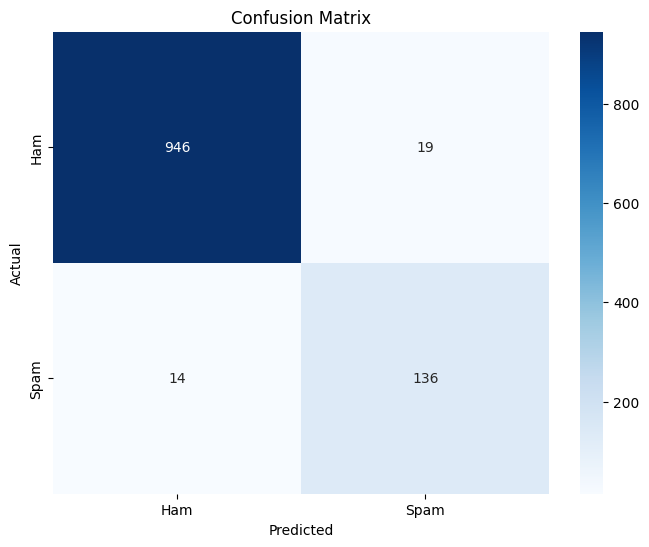

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WordCloud for Spam Messages

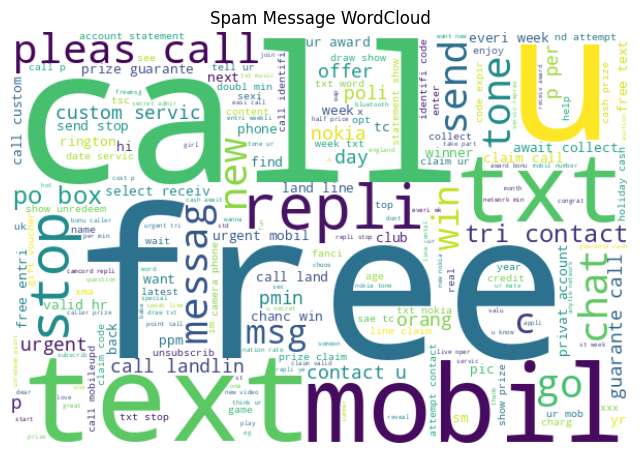

In [38]:
spam_words = " ".join(df[df['label'] == 1]['processed_message'])
spam_wordcloud = WordCloud(width=600, height=400, background_color="white").generate(spam_words)
plt.figure(figsize=(8, 6))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Message WordCloud")
plt.show()

WordCloud for Ham Messages

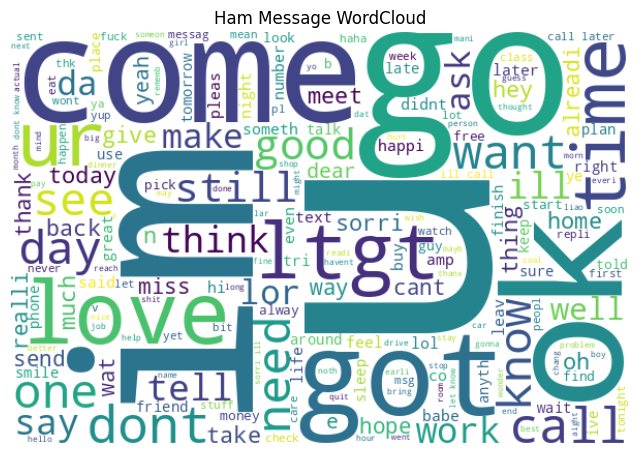

In [39]:
ham_words = " ".join(df[df['label'] == 0]['processed_message'])
ham_wordcloud = WordCloud(width=600, height=400, background_color="white").generate(ham_words)
plt.figure(figsize=(8, 6))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham Message WordCloud")
plt.show()

**Analysis Questions Answers**

Model Accuracy and Performance Metrics

In [40]:
# Model Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9704035874439462


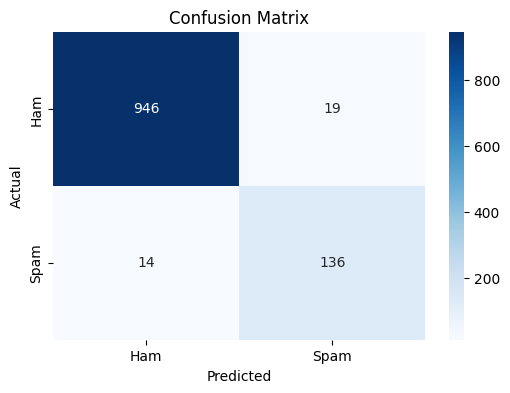

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Most Frequent Words in Each Class & Their Posterior Probabilities

In [42]:
# Extract class-specific feature probabilities
feature_names = vectorizer.get_feature_names_out()
ham_log_prob = nb_classifier.feature_log_prob_[0]  # Ham class
spam_log_prob = nb_classifier.feature_log_prob_[1]  # Spam class

# Top 5 Ham words
top5_ham_idx = np.argsort(ham_log_prob)[-5:]  # Indices of top words
top5_ham_words = [(feature_names[i], np.exp(ham_log_prob[i])) for i in top5_ham_idx]

# Top 5 Spam words
top5_spam_idx = np.argsort(spam_log_prob)[-5:]  # Indices of top words
top5_spam_words = [(feature_names[i], np.exp(spam_log_prob[i])) for i in top5_spam_idx]

print("\nTop 5 Words in Ham (Non-Spam) Messages:")
print(pd.DataFrame(top5_ham_words, columns=["Word", "Probability"]))

print("\nTop 5 Words in Spam Messages:")
print(pd.DataFrame(top5_spam_words, columns=["Word", "Probability"]))


Top 5 Words in Ham (Non-Spam) Messages:
   Word  Probability
0  ltgt     0.006412
1  come     0.006440
2   get     0.007804
3    go     0.009550
4    im     0.010232

Top 5 Words in Spam Messages:
    Word  Probability
0  mobil     0.007308
1     ur     0.007569
2    txt     0.008874
3   free     0.011745
4   call     0.019053


Way to improve the Model Performance

To get the performance of the model improved, I would first switch from 'CountVectorizer' to 'TF-IDF'. It helps by giving higher importance to words that are less frequently found in the documents. This brings a better discrimination between the spam and ham messages. I would also improve the preprocessing by substituting stemming with 'lemmatization', which keeps the original meaning of the word over the roots. Additional explorations of 'n-grams', including bigrams and trigrams, could capture more contextual information. Last, I will try to use different machine learning algorithms, such as Logistic Regression or Random Forest, to improve generalization and performance.

If the Dataset is Bigger, Will Accuracy Increase?

If the dataset is larger, then I think it might increase accuracy, especially if the extra data is of high quality and well-balanced. More data allows the model to generalize better and learn from more examples. I also realize, however, that accuracy may not necessarily improve with the introduction of noisy or irrelevant data in the dataset. If the data does not balance the scales-often more ham than spam-the model may be skewed by such data. Considering techniques, like oversampling and undersampling, will be necessary for both classes to ensure better performance in classifying them.